# Spotify Popularity Predictor

The goal is to create a model that predicts the popularity of a song based on its features.

The dataset contains a list of tracks with the following characteristics:
- `acousticness`: whether the track is acoustic
- `danceability`: describes how suitable a track is for dancing
- `duration_ms`: duration of the track in milliseconds
- `energy`: represents a perceptual measure of intensity and activity
- `explicit`: whether the track has explicit lyrics
- `id`: id for the track
- `instrumentalness`: predicts whether a track contains no vocals
- `key`: the key the track is in
- `liveness`: detects the presence of an audience in the recording
- `loudness`: the overall loudness of a track in decibels
- `mode`: modality of a track
- `name`: name of the track
- `popularity`: popularity of the track
- `release_date`: release date
- `speechiness`: detects the presence of spoken words in a track
- `tempo`: overall estimated tempo of a track in beats per minute
- `valence`: describes the musical positiveness conveyed by a track
- `artist`: artist who performed the track

# Model

## Data collection

📝 **Load the `spotify_popularity_train.csv` dataset**
- Display the first few rows
- Perform the basic cleaning operations (remove redundant lines, as well as those with missing values)
- Store the result in a `DataFrame` named `data`

In [1]:
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/spotify_popularity_train.csv"

In [2]:
import pandas as pd
data = pd.read_csv(url)

data.head()

acousticness  danceability  duration_ms  energy  explicit  \
0       0.65400         0.499       219827   0.190         0   
1       0.00592         0.439       483948   0.808         0   
2       0.73400         0.523       245693   0.288         0   
3       0.42900         0.681       130026   0.165         0   
4       0.56200         0.543       129813   0.575         0   

                       id  instrumentalness  key  liveness  loudness  mode  \
0  0B6BeEUd6UwFlbsHMQKjob          0.004090    7    0.0898   -16.435     1   
1  5Gpx4lJy3vKmIvjwbiR5c8          0.140000    2    0.0890    -8.497     1   
2  7MxuUYqrCIy93h1EEHrIrL          0.000000    0    0.0771   -11.506     1   
3  4GeYbfIx1vSQXTfQb1m8Th          0.000000   11    0.3940   -21.457     0   
4  2JPGGZwajjMk0vvhfC17RK          0.000004    2    0.1270    -7.374     1   

                                      name  popularity release_date  \
0                  Back in the Goodle Days          40         1971   
1        Worlds Which Break Us - Intro Mix          22   2015-02-02   
2                    I'm The Greatest Star          40   1968-09-01   
3  Kapitel 281 - Der Page und die Herzogin           1         1926   
4                            Away from You          15   2008-02-11   

   speechiness    tempo  valence                  artist  
0       0.0454  149.460   0.4300           John Hartford  
1       0.0677  138.040   0.0587               Driftmoon  
2       0.2140   75.869   0.4640        Barbra Streisand  
3       0.9460  145.333   0.2880         Georgette Heyer  
4       0.0265  139.272   0.8010  Gerry & The Pacemakers

In [3]:
data.shape

(52317, 18)

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.isnull().sum().sort_values(ascending=False)/len(data)

artist              0.000077
valence             0.000000
danceability        0.000000
duration_ms         0.000000
energy              0.000000
explicit            0.000000
id                  0.000000
instrumentalness    0.000000
key                 0.000000
liveness            0.000000
loudness            0.000000
mode                0.000000
name                0.000000
popularity          0.000000
release_date        0.000000
speechiness         0.000000
tempo               0.000000
acousticness        0.000000
dtype: float64

In [6]:
#Mask to drop the rows without artist name
#data = data[~data.artist.isnull()]
data = data.dropna()  

In [7]:
data.isnull().sum().sort_values(ascending=False)/len(data)

artist              0.0
valence             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
acousticness        0.0
dtype: float64

🧪 **Saving the results**

In [8]:
from nbresult import ChallengeResult

ChallengeResult(
    "data_cleaning",
    shape=data.shape).write()

## Simple model

In [9]:
scoring = "neg_root_mean_squared_error"

this metric:
    Strongly penalize largest errors
    Measure errors in the same unit than popularity
    Is better when greater (metric_good_model > metric_bad_model)

**📝 Let's build a first simple linear model using only the numerical features in the dataset to start with**

In [10]:
X_simple = data.drop(['name', 'popularity','artist','id','release_date'], axis = 1)

In [11]:
y = data[['popularity']]

### Holdout evaluation

**📝 Create the 4 variables `X_train_simple` `y_train`, `X_test_simple`, `y_test` with a 50% split with random sampling**

In [12]:
from sklearn.model_selection import train_test_split
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.5, random_state=42)

**📝 Fit and evaluate a basic linear model with this holdout method**`

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
model.fit(X_train_simple, y_train) # Train model
y_pred = model.predict(X_test_simple)

In [14]:
from sklearn.metrics import mean_squared_error
result=-mean_squared_error(y_test, y_pred,squared=False)

In [15]:
result

-18.391930486295614

In [16]:
score_simple_holdout = result

### Cross-validation evaluation

📝 **Let's be sure our score is representative**: 
- 5-times cross validate a basic linear model on the whole numeric dataset (`X_simple`, `y`)
- Do not fine tune the model
- Mean performance is stored in a variable `score_simple_cv_mean` as a `float`
- Standard deviation of the performances is in a float variable `score_simple_cv_std`

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_simple, y, cv=5, scoring=scoring)

In [18]:
score_simple_cv_mean = scores.mean()

In [19]:
score_simple_cv_mean

-18.36055855156951

In [20]:
score_simple_cv_std = scores.std()

🧪 **Saving the results**

In [21]:
from nbresult import ChallengeResult

ChallengeResult(
    "simple_model",
    scoring=scoring,
    shape_train = X_train_simple.shape,
    score_simple_holdout=score_simple_holdout,
    score_simple_cv_mean=score_simple_cv_mean,
    score_simple_cv_std=score_simple_cv_std,
).write()

## Feature engineering

Let's try to improve performance using the feature `release_date`

**📝 Create `X_engineered` by adding a new column `year` to `X`, containing the release year of the track as `integer`**

In [22]:
data['year'] = pd.to_datetime(data.release_date).dt.year

In [23]:
X_engineered = data.drop(['name', 'popularity','artist','id','release_date'], axis = 1)

In [24]:
X_engineered.head(2)

acousticness  danceability  duration_ms  energy  explicit  \
0       0.65400         0.499       219827   0.190         0   
1       0.00592         0.439       483948   0.808         0   

   instrumentalness  key  liveness  loudness  mode  speechiness   tempo  \
0           0.00409    7    0.0898   -16.435     1       0.0454  149.46   
1           0.14000    2    0.0890    -8.497     1       0.0677  138.04   

   valence  year  
0   0.4300  1971  
1   0.0587  2015

📝 **Let's see how this impact the performance of our model.**
- Retrain the same simple linear model on numerical values only, adding the new feature `year`
- Save the mean cross-validated performance metric in a variable named `score_engineered` as a `float`
- Do not fine tune the model yet

In [25]:
scores2 = cross_val_score(model, X_engineered, y, cv=5, scoring=scoring)

In [26]:
score_engineered = scores2.mean()

In [27]:
score_engineered

-17.301966769706475

🧪 **Saving the results**

In [28]:
from nbresult import ChallengeResult

ChallengeResult("feature_engineering",
    cols = X_engineered.columns,
    years = X_engineered.get("year"),
    score_engineered=score_engineered
).write()

## Pipelining

Let's now look for maximum performance by creating a solid preprocessing pipeline.

**📝 Create a sklearn preprocessing [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and store it as `preproc`**

In [29]:
# 👉 Do not hesitate to reload a clean new dataset if you need a fresh start.
X = data.drop(['id'], axis = 1)
y = data[['popularity']]

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

class ArtistPopularityTransformer(BaseEstimator, TransformerMixin):
    """
    Compute, as a new feature of the test set, the mean popularity of 
    all songs made by the artist on the train set.
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        process artist mean popularity from artists songs popularity
        process song global mean popularity
        """

        # process artist popularity
        self.artist_popularity = y.groupby(X.artist).agg("mean")
        self.artist_popularity.name = "artist_popularity"

        # process mean popularity
        self.mean_popularity = y.mean()

        return self

    def transform(self, X, y=None):
        """
        apply artist mean popularity vs song global mean popularity to songs
        """

        # inject artist popularity
        X = X.merge(self.artist_popularity, how="left", left_on="artist", right_index=True)
       
        # fills popularity of unknown artists with song global mean popularity
        X.replace(np.nan, self.mean_popularity, inplace=True)

        return X['artist_popularity']

In [31]:
#Checking which columns need to be scaled
X.describe()

acousticness  danceability   duration_ms        energy      explicit  \
count  52053.000000  52053.000000  5.205300e+04  52053.000000  52053.000000   
mean       0.498218      0.536523  2.324970e+05      0.483881      0.069698   
std        0.379814      0.176418  1.433212e+05      0.273028      0.254640   
min        0.000000      0.000000  5.991000e+03      0.000000      0.000000   
25%        0.086700      0.413000  1.664000e+05      0.249000      0.000000   
50%        0.516000      0.548000  2.062130e+05      0.468000      0.000000   
75%        0.893000      0.669000  2.662540e+05      0.713000      0.000000   
max        0.996000      0.986000  4.800118e+06      1.000000      1.000000   

       instrumentalness           key      liveness      loudness  \
count      52053.000000  52053.000000  52053.000000  52053.000000   
mean           0.195664      5.191536      0.211833    -11.745365   
std            0.333686      3.526759      0.180351      5.696061   
min            0.000000      0.000000      0.000000    -60.000000   
25%            0.000000      2.000000      0.099500    -14.913000   
50%            0.000469      5.000000      0.139000    -10.836000   
75%            0.240000      8.000000      0.273000     -7.478000   
max            1.000000     11.000000      0.999000      3.744000   

               mode    popularity   speechiness         tempo       valence  \
count  52053.000000  52053.000000  52053.000000  52053.000000  52053.000000   
mean       0.705665     25.815188      0.106189    117.077248      0.524738   
std        0.455747     21.864219      0.182825     30.266286      0.263819   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.035200     94.004000      0.312000   
50%        1.000000     26.000000      0.045700    115.939000      0.538000   
75%        1.000000     42.000000      0.076800    135.114000      0.742000   
max        1.000000     96.000000      0.970000    243.507000      1.000000   

               year  
count  52053.000000  
mean    1976.912339  
std       26.851577  
min     1920.000000  
25%     1955.000000  
50%     1977.000000  
75%     1999.000000  
max     2021.000000

In [32]:
X.key.nunique()

12

### Choose a scaler

In [33]:
X[['acousticness']].boxplot()
X[['acousticness']].plot.hist(bins=10)

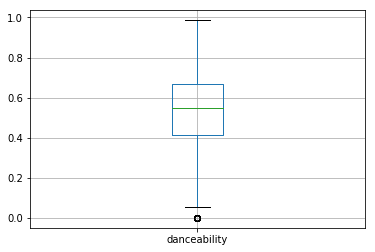

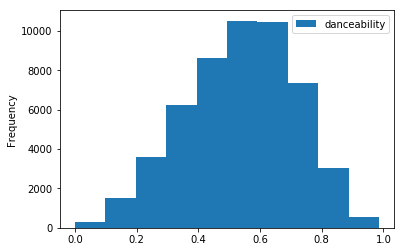

In [34]:
X[['danceability']].boxplot()
X[['danceability']].plot.hist(bins=10)

In [35]:
#X[X.danceability < 0.05].count()

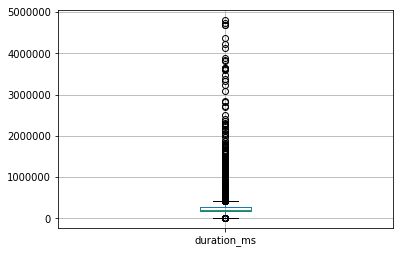

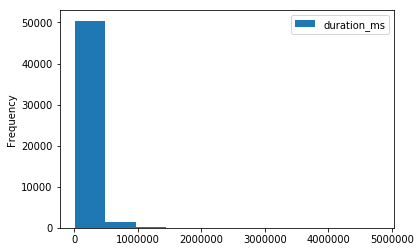

In [36]:
X[['duration_ms']].boxplot()
X[['duration_ms']].plot.hist(bins=10)

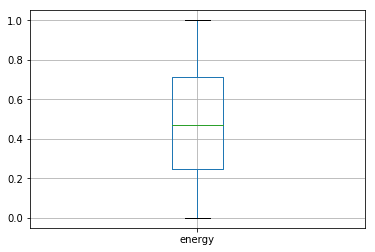

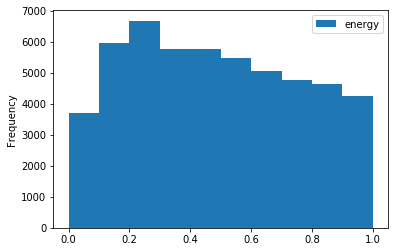

In [37]:
X[['energy']].boxplot()
X[['energy']].plot.hist(bins=10)

In [38]:
X.explicit.nunique()

2

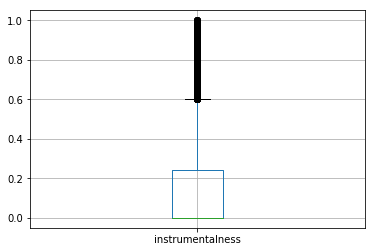

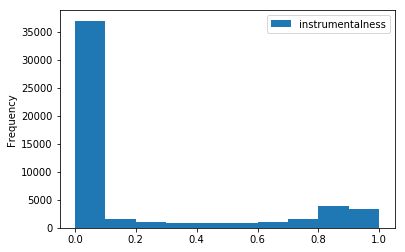

In [39]:
X[['instrumentalness']].boxplot()
X[['instrumentalness']].plot.hist(bins=10)

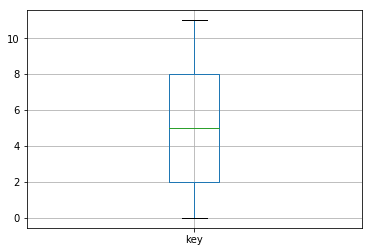

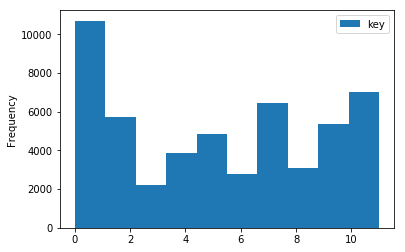

In [40]:
X[['key']].boxplot()
X[['key']].plot.hist(bins=10)

In [41]:
X.key.nunique()

12

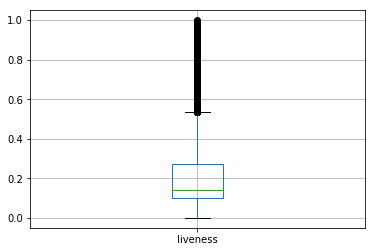

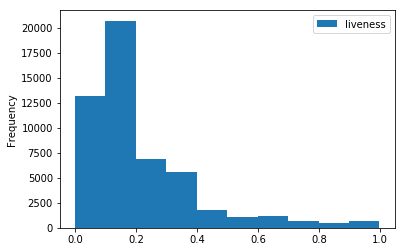

In [42]:
X[['liveness']].boxplot()
X[['liveness']].plot.hist(bins=10)

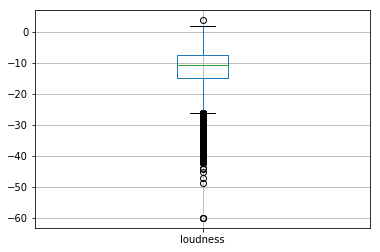

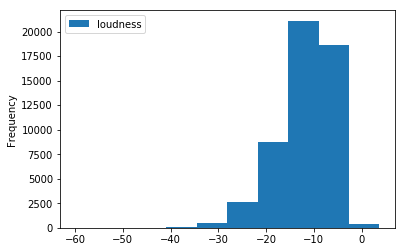

In [43]:
X[['loudness']].boxplot()
X[['loudness']].plot.hist(bins=10)

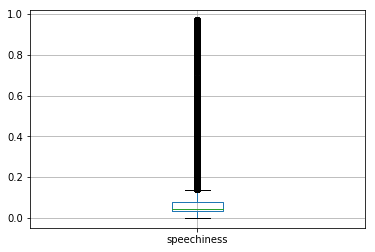

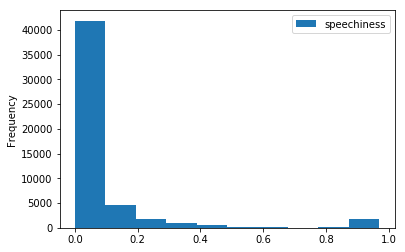

In [44]:
X[['speechiness']].boxplot()
X[['speechiness']].plot.hist(bins=10)

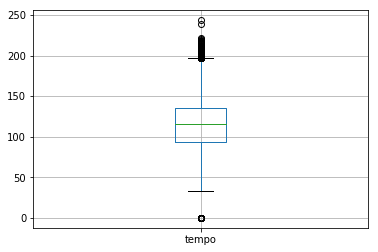

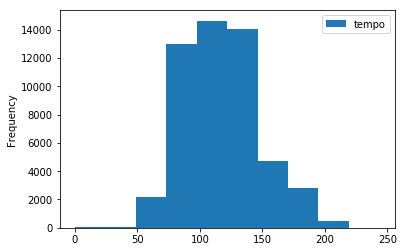

In [45]:
X[['tempo']].boxplot()
X[['tempo']].plot.hist(bins=10)

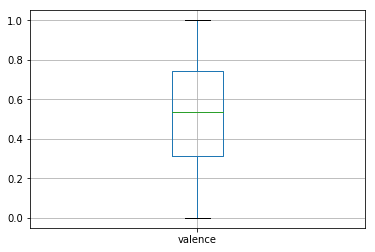

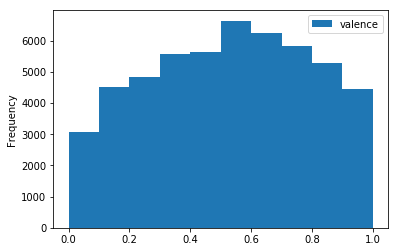

In [46]:
X[['valence']].boxplot()
X[['valence']].plot.hist(bins=10)

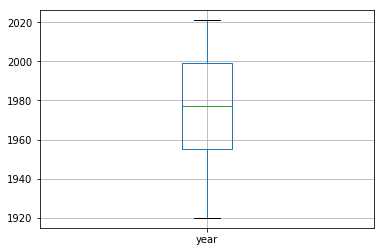

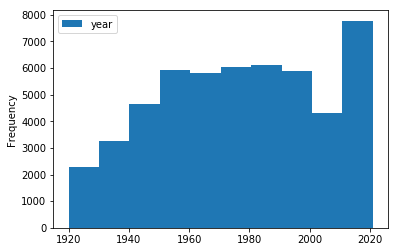

In [47]:
X[['year']].boxplot()
X[['year']].plot.hist(bins=10)

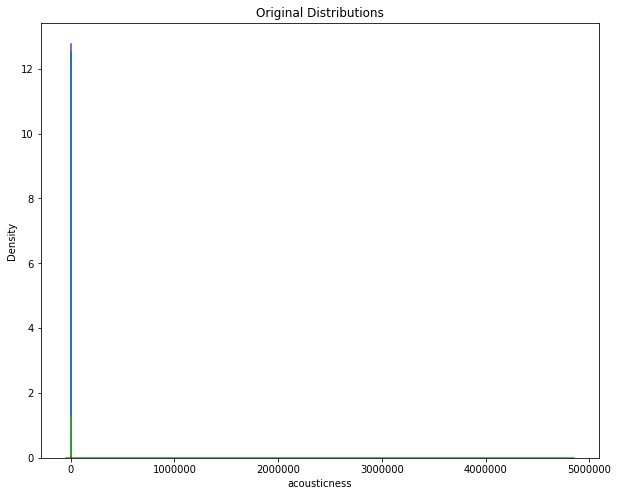

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(X['acousticness'], ax=ax1)
sns.kdeplot(X['danceability'], ax=ax1)
sns.kdeplot(X['duration_ms'], ax=ax1)
sns.kdeplot(X['energy'], ax=ax1)
sns.kdeplot(X['explicit'], ax=ax1)
sns.kdeplot(X['instrumentalness'], ax=ax1)
sns.kdeplot(X['key'], ax=ax1)
sns.kdeplot(X['liveness'], ax=ax1)
sns.kdeplot(X['loudness'], ax=ax1)
sns.kdeplot(X['mode'], ax=ax1)
sns.kdeplot(X['speechiness'], ax=ax1)
sns.kdeplot(X['tempo'], ax=ax1)
sns.kdeplot(X['valence'], ax=ax1)
sns.kdeplot(X['year'], ax=ax1)

In [49]:
#col_names = list(X.columns)

### Pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

year_constructor = FunctionTransformer(lambda df: pd.DataFrame\
                                        ([pd.to_datetime(date).year for date in df.release_date]))
drop_some_col = FunctionTransformer(lambda df: df.drop(columns=['id','name','release_date','artist']))

#artist_preproc = Pipeline([
    #('artist_popularity', ArtistPopularityTransformer()),
    #('scaler', MinMaxScaler())])

year_preproc = Pipeline([
    ('year', year_constructor),
    ('scaler', MinMaxScaler())
])

r_transformer = Pipeline([
    ('scaler3', RobustScaler()),
    ])

mm_transformer = Pipeline([
    ('scaler2', MinMaxScaler()),
    ])

# Encode categorical variables
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Paralellize "num_transformer" and "One hot encoder"
preproc = ColumnTransformer([
    #('artist_preproc', artist_preproc, ['artist']),
    ('year_preproc', year_preproc, ['release_date']), 
    ('mm_transformer', mm_transformer, ['duration_ms','loudness','tempo','year']),
    ('r_transformer', r_transformer, ['acousticness','danceability','energy','instrumentalness','liveness','speechiness','valence']),
    ('cat_transformer', cat_transformer, ['explicit','key','mode'])])

In [51]:

#Creating the preprocessor, composed of other pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

year_constructor = FunctionTransformer(lambda df: pd.DataFrame\
                                        ([pd.to_datetime(date).year for date in df.release_date]))
drop_some_col = FunctionTransformer(lambda df: df.drop(columns=['id','name','release_date','artist']))

#artist_preproc = Pipeline([
    #('artist_popularity', ArtistPopularityTransformer()),
    #('scaler', MinMaxScaler())])

year_preproc = Pipeline([
    ('year', year_constructor),
    ('scaler', MinMaxScaler())
])

other_preproc = ColumnTransformer([
    ('scaling', RobustScaler(), ['duration_ms','loudness','tempo']),
    ('encoding', OneHotEncoder(sparse = False), ['key'])],
    remainder = 'passthrough')

preproc = ColumnTransformer([
    #('artist_preproc', artist_preproc, ['artist']),
    ('year_preproc', year_preproc, ['release_date']),
    ('other_preproc', other_preproc, ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
               'instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'valence'])
])

In [52]:
preproc.fit_transform(X,y)

array([[ 0.5049505 ,  0.13633906, -0.75305985, ...,  1.        ,
         0.0454    ,  0.43      ],
       [ 0.94059406,  2.78141086,  0.31459314, ...,  1.        ,
         0.0677    ,  0.0587    ],
       [ 0.47524752,  0.39537725, -0.09011432, ...,  1.        ,
         0.214     ,  0.464     ],
       ...,
       [ 0.99009901,  1.04779979,  0.73813046, ...,  1.        ,
         0.0275    ,  0.338     ],
       [ 0.31683168,  0.10295031, -1.36893073, ...,  1.        ,
         0.0355    ,  0.41      ],
       [ 0.72277228,  0.12378072, -0.57121722, ...,  0.        ,
         0.0318    ,  0.67      ]])

In [53]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 4000

In [54]:
pd.DataFrame(preproc.fit_transform(X))

0          1         2         3    4    5    6    7    8    9   \
0      0.504950   0.136339 -0.753060  0.815398  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.940594   2.781411  0.314593  0.537606  0.0  0.0  1.0  0.0  0.0  0.0   
2      0.475248   0.395377 -0.090114 -0.974702  1.0  0.0  0.0  0.0  0.0  0.0   
3      0.059406  -0.762984 -1.428514  0.715009  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.871287  -0.765117  0.465636  0.567575  0.0  0.0  1.0  0.0  0.0  0.0   
5      0.653465   0.233140 -0.753732  0.062564  1.0  0.0  0.0  0.0  0.0  0.0   
6      0.425743   2.378272 -0.268729 -0.100243  0.0  0.0  0.0  0.0  0.0  0.0   
7      0.574257   1.246760 -0.144586 -0.115763  0.0  0.0  0.0  0.0  0.0  0.0   
8      0.891089   0.441585  0.889038  0.584797  0.0  0.0  1.0  0.0  0.0  0.0   
9      0.415842  -0.217117 -1.184398 -0.728485  0.0  0.0  0.0  0.0  0.0  1.0   
10     0.990099  -0.966491  0.367989 -0.872732  0.0  0.0  0.0  0.0  0.0  0.0   
11     0.297030  -1.070263 -0.696570  0.391243  0.0  0.0  0.0  0.0  0.0  0.0   
12     0.445545  -0.479500  0.069939  0.114425  0.0  0.0  1.0  0.0  0.0  0.0   
13     0.346535  -0.220051 -0.538399 -0.503308  1.0  0.0  0.0  0.0  0.0  0.0   
14     0.990099   2.377201  0.367586  0.707516  0.0  0.0  0.0  0.0  0.0  0.0   
15     0.099010   0.286438 -0.046806 -1.042009  0.0  0.0  0.0  0.0  0.0  0.0   
16     0.980198   0.142999  0.404304 -0.115227  0.0  0.0  0.0  0.0  1.0  0.0   
17     0.732673   1.254101  0.676395 -0.390124  0.0  0.0  0.0  0.0  0.0  0.0   
18     0.297030  26.433212 -0.859314 -0.795354  0.0  0.0  0.0  0.0  1.0  0.0   
19     0.584158   1.820127  0.784667  1.979202  0.0  0.0  0.0  0.0  0.0  0.0   
20     0.356436  -0.132854 -0.808473 -0.904403  0.0  0.0  0.0  0.0  0.0  0.0   
21     0.198020  -0.649669 -1.443309 -0.986694  0.0  1.0  0.0  0.0  0.0  0.0   
22     0.762376  -1.046989  0.359247 -0.245366  0.0  1.0  0.0  0.0  0.0  0.0   
23     0.039604  -0.399383 -0.049092  1.791462  0.0  0.0  0.0  0.0  0.0  0.0   
24     0.425743  -0.540649 -0.475857  0.089540  1.0  0.0  0.0  0.0  0.0  0.0   
25     0.405941   3.496976 -1.378480  0.249404  0.0  0.0  0.0  0.0  0.0  0.0   
26     0.990099  -0.395698  0.938399 -0.363367  0.0  0.0  0.0  0.0  0.0  1.0   
27     0.485149   0.876750 -0.746604  0.450961  1.0  0.0  0.0  0.0  0.0  0.0   
28     0.386139  -0.025497 -0.584129 -1.197543  0.0  0.0  0.0  0.0  1.0  0.0   
29     0.980198   0.432772 -0.436718 -0.854172  0.0  0.0  0.0  0.0  0.0  0.0   
30     0.316832  -0.123911 -0.274781 -0.884359  1.0  0.0  0.0  0.0  0.0  0.0   
31     0.544554  -0.522893 -1.769738 -0.434298  0.0  0.0  0.0  0.0  0.0  1.0   
32     0.425743  -0.494182  0.086483 -1.011725  0.0  0.0  0.0  0.0  0.0  0.0   
33     0.099010  -0.245559 -0.179422 -0.123011  0.0  0.0  1.0  0.0  0.0  0.0   
34     0.950495  -0.417510  0.789240 -0.837533  0.0  1.0  0.0  0.0  0.0  0.0   
35     0.415842  -0.265848  0.199866  1.578716  0.0  0.0  0.0  0.0  0.0  1.0   
36     0.485149   2.178250 -0.043578 -0.154099  0.0  0.0  1.0  0.0  0.0  0.0   
37     0.693069  -0.868328 -2.078144  1.324811  0.0  0.0  1.0  0.0  0.0  0.0   
38     0.702970  -0.395978  0.116611 -0.428266  0.0  0.0  0.0  0.0  0.0  0.0   
39     0.910891  -0.865524  0.340013  0.858964  0.0  0.0  0.0  0.0  0.0  0.0   
40     0.148515   0.854447 -0.261601 -0.024228  0.0  0.0  0.0  0.0  0.0  0.0   
41     0.663366   0.027911 -2.027707  0.676283  0.0  0.0  0.0  0.0  0.0  0.0   
42     0.475248  -0.459601  0.275723 -1.253053  0.0  0.0  0.0  0.0  0.0  0.0   
43     0.356436  -0.522493 -1.880834 -0.880929  0.0  0.0  0.0  0.0  0.0  1.0   
44     0.594059   0.012158 -1.954808 -0.828120  0.0  0.0  0.0  0.0  0.0  0.0   
45     0.742574  -0.301240  0.626093 -0.835831  0.0  0.0  0.0  0.0  0.0  0.0   
46     0.752475   0.890240  0.629052  0.050353  1.0  0.0  0.0  0.0  0.0  0.0   
47     0.772277   0.567368  0.296032  0.610654  0.0  0.0  0.0  0.0  0.0  0.0   
48     0.257426  -0.523024 -2.305178 -0.920871  0.0  0.0  0.0  0.0  0.0  0.0   
49     0.3861

In [55]:
np.shape(preproc.fit_transform(X, y))

(52053, 25)

In [56]:
col_number=28

🧪 **Saving the results**

In [57]:
# Visually print the preproc
from sklearn import set_config; set_config(display='diagram')
preproc

ColumnTransformer(transformers=[('year_preproc',
                                 Pipeline(steps=[('year',
                                                  FunctionTransformer(func=<function <lambda> at 0x000001FC436A6510>)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['release_date']),
                                ('other_preproc',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('scaling',
                                                                  RobustScaler(),
                                                                  ['duration_ms',
                                                                   'loudness',
                                                                   'tempo']),
                                                                 ('encoding',
                                                                  OneHotEncoder(sparse=False),
                                                                  ['key'])]),
                                 ['acousticness', 'danceability', 'duration_ms',
                                  'energy', 'explicit', 'instrumentalness',
                                  'key', 'liveness', 'loudness', 'mode',
                                  'speechiness', 'tempo', 'valence'])])

In [58]:
from nbresult import ChallengeResult

ChallengeResult(
    "preprocessing",
    col_number=col_number,
    first_observation = preproc.fit_transform(X, y)[0]
).write()

## Training

📝 **Time to fine tune the models**

- Add an **estimator** to the pipeline

- Train the pipeline and **fine-tune** (optimize) the estimator to maximize prediction score

- fine tune at least 2 different models: 
    - one pipeline with a **linear model**
    - one pipeline with an **ensemble model**

### Linear

In [59]:
from sklearn.linear_model import Ridge
final_pipe = Pipeline([
    ('preprocessing', preproc),
    ('linear_regression', Ridge())])

In [60]:
score_linear = cross_val_score(final_pipe, X, y, cv=5, scoring=scoring).mean()
score_linear

-17.303651502699918

In [61]:
#pipe_linear.get_params()

In [62]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    final_pipe, 
    param_grid={
        # Access any component of the pipeline, as far back as you want
        'linear_regression__alpha': [10]},
    cv=5,
    scoring=scoring)

grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('year_preproc',
                                                                         Pipeline(steps=[('year',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x000001FC436A6510>)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['release_date']),
                                                                        ('other_preproc',
                                                                         ColumnTransformer(remainder='passthrough',
                                                                                           transformers=[('scaling',
                                                                                                          RobustScaler(),
                                                                                                          ['duration_ms',
                                                                                                           'loudness',
                                                                                                           'tempo']),
                                                                                                         ('encoding',
                                                                                                          OneHotEncoder(sparse=False),
                                                                                                          ['key'])]),
                                                                         ['acousticness',
                                                                          'danceability',
                                                                          'duration_ms',
                                                                          'energy',
                                                                          'explicit',
                                                                          'instrumentalness',
                                                                          'key',
                                                                          'liveness',
                                                                          'loudness',
                                                                          'mode',
                                                                          'speechiness',
                                                                          'tempo',
                                                                          'valence'])])),
                                       ('linear_regression', Ridge())]),
             param_grid={'linear_regression__alpha': [10]},
             scoring='neg_root_mean_squared_error')

In [63]:
grid_search.best_params_

{'linear_regression__alpha': 10}

In [64]:
grid_search.best_score_

-17.30370443881646

### Ensemble

In [65]:
from sklearn.tree import DecisionTreeRegressor
pipe_ensemble = Pipeline([
    ('preprocessor', preproc),
    ('model', DecisionTreeRegressor())
])

score_ensemble = cross_val_score(pipe_ensemble, X, y, cv=5, scoring=scoring).mean()
score_ensemble

-18.263486390100358

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

final_pipe2 = Pipeline([
    ('preprocessing', preproc),
    ('GBR', GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1
))])

#pipe_ensemble = final_pipe2.fit(X_train,y_train)
#pipe_ensemble.predict(X_test)
#pipe_ensemble.score(X_test,y_test)

# Cross validate pipeline
score_ensemble2 = cross_val_score(final_pipe2, X, y, cv=5, scoring=scoring).mean()
score_ensemble2


C:\Users\mvalyashova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mvalyashova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mvalyashova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mvalyashova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A col

-13.492188066544248

In [67]:
#Tuning of the ensemble pipeline
grid_search2 = GridSearchCV(
    pipe_ensemble, 
    param_grid={
        'model__min_samples_split': [20], #[1,2,10]
        'model__max_depth': [8]},#[4,8,16] [6, 8, 10]
    cv=5,
    scoring=scoring)
grid_search2.fit(X,y);
grid_search2.best_params_ , grid_search2.best_score_

({'model__max_depth': 8, 'model__min_samples_split': 20}, -14.003307912331383)

In [68]:
score_ensemble = grid_search2.best_score_

🧪 **Saving the results**

In [69]:
# Print the best pipe for correction purpose
from sklearn import set_config; set_config(display='diagram')

In [70]:
pipe_ensemble

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('year_preproc',
                                                  Pipeline(steps=[('year',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000001FC436A6510>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['release_date']),
                                                 ('other_preproc',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('scaling',
                                                                                   RobustScaler(),
                                                                                   ['duration_ms',
                                                                                    'loudness',
                                                                                    'tempo']),
                                                                                  ('encoding',
                                                                                   OneHotEncoder(sparse=False),
                                                                                   ['key'])]),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'explicit',
                                                   'instrumentalness', 'key',
                                                   'liveness', 'loudness',
                                                   'mode', 'speechiness',
                                                   'tempo', 'valence'])])),
                ('model', DecisionTreeRegressor())])

In [71]:
from nbresult import ChallengeResult

ChallengeResult("model_tuning",
    scoring = scoring,
    score_linear=score_linear,
    score_ensemble=score_ensemble).write()